In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import mglearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.datasets import make_moons 

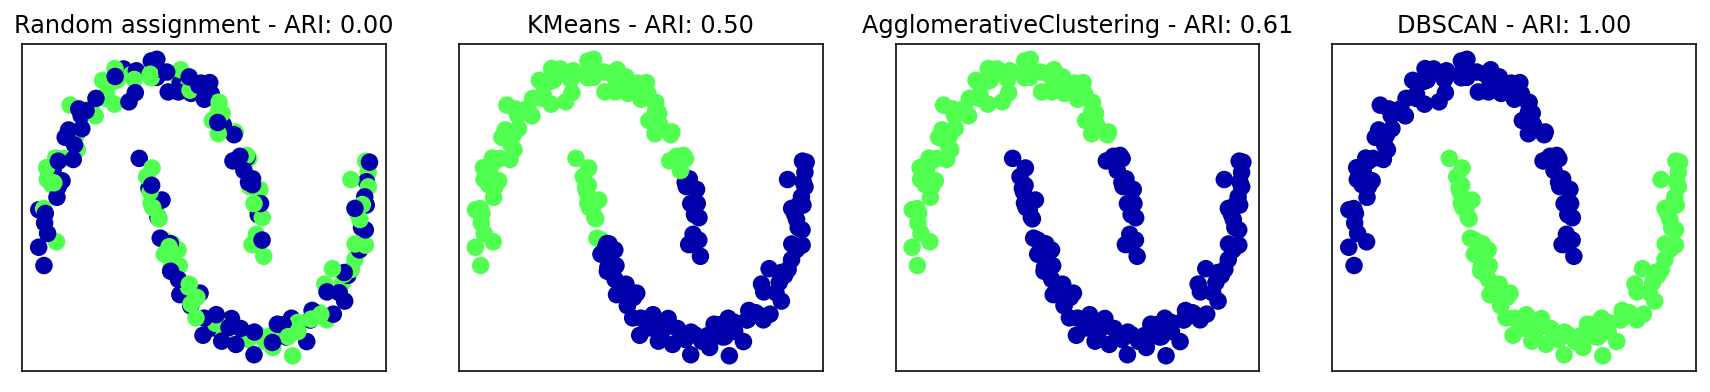

In [2]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)

#将数据缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# 列出要使用的算法
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# 创建一个随机的簇分配，作为参考  [low,high)
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60) 
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled) 
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y, clusters)))
